## Packages

In [99]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from scipy.stats import chi2_contingency 
import researchpy as rp
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
from collections import Counter
import itertools

In [2]:
#Display full contents of a dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

## Load the dataset

In [3]:
test=pd.read_csv('C:/Users/seagu/OneDrive/Paris/ds_take_home_challenges/Spanish Translation A/Translation_Test/test_table.csv')
user=pd.read_csv('C:/Users/seagu/OneDrive/Paris/ds_take_home_challenges/Spanish Translation A/Translation_Test/user_table.csv')

In [5]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [6]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [4]:
#Merge the datasets
df=pd.merge(test,user,on='user_id')
df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico


## Explore the dataset

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452867 entries, 0 to 452866
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           452867 non-null  int64         
 1   date              452867 non-null  datetime64[ns]
 2   source            452867 non-null  object        
 3   device            452867 non-null  object        
 4   browser_language  452867 non-null  object        
 5   ads_channel       181693 non-null  object        
 6   browser           452867 non-null  object        
 7   conversion        452867 non-null  int64         
 8   test              452867 non-null  int64         
 9   sex               452867 non-null  object        
 10  age               452867 non-null  int64         
 11  country           452867 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 44.9+ MB


In [80]:
#convert to datetime Dtype
df['date']= pd.to_datetime(df['date'],format='%Y-%m-%d')

In [37]:
data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]

def display_data_description(data, Numerical_data_types, categorical_data_types):
    
    print("Data Description :")
    display(data.describe().T)
    display(data.describe(include=np.object).T)

display_data_description(df,data_types[0:4] ,data_types[4:7])

Data Description :


,count,mean,std,min,25%,50%,75%,max
user_id,452867.0,499944.805166,288676.264784,1.0,249819.0,500019.0,749543.0,1000000.0
conversion,452867.0,0.049560,0.217034,0.0,0.0,0.0,0.0,1.0
test,452867.0,0.476462,0.499446,0.0,0.0,0.0,1.0,1.0
age,452867.0,27.130740,6.776678,18.0,22.0,26.0,31.0,70.0


C:\Users\seagu\AppData\Local\Temp\ipykernel_32440\1043939486.py:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  display(data.describe(include=np.object).T)


,count,unique,top,freq
source,452867,3,Ads,181693
device,452867,2,Web,251316
browser_language,452867,3,ES,377160
ads_channel,181693,5,Facebook,68358
browser,452867,7,Android_App,154977
sex,452867,2,M,264485
country,452867,17,Mexico,128484


In [92]:
# check for unique value
def check_data_unique(df):
    for column in df.columns:
        uniques = df[column].unique()
        print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:10])

In [45]:
check_data_unique(df)

user_id              452867	 [315281 497851 848402 290051 548435 540675 863394 527287 261625  10427]
date                     5	 ['2015-12-03T00:00:00.000000000' '2015-12-04T00:00:00.000000000'
 '2015-11-30T00:00:00.000000000' '2015-12-01T00:00:00.000000000'
 '2015-12-02T00:00:00.000000000']
source                   3	 ['Direct' 'Ads' 'SEO']
device                   2	 ['Web' 'Mobile']
browser_language         3	 ['ES' 'Other' 'EN']
ads_channel              6	 [nan 'Google' 'Facebook' 'Bing' 'Yahoo' 'Other']
browser                  7	 ['IE' 'Chrome' 'Android_App' 'FireFox' 'Iphone_App' 'Safari' 'Opera']
conversion               2	 [1 0]
test                     2	 [0 1]
sex                      2	 ['M' 'F']
age                     52	 [32 21 34 22 19 35 31 33 37 29]
country                 17	 ['Spain' 'Mexico' 'Venezuela' 'Bolivia' 'Colombia' 'Uruguay' 'El Salvador'
 'Nicaragua' 'Peru' 'Costa Rica']


In [7]:
#check for null value
null_df = df.isnull().sum() / df.shape[0] * 100
null_df

user_id             0.0
date                0.0
source              0.0
device              0.0
browser_language    0.0
ads_channel         0.0
browser             0.0
conversion          0.0
test                0.0
sex                 0.0
age                 0.0
country             0.0
dtype: float64

In [6]:
#Impute missing value: ads_channel. Since there are almost 60% missing value in ads_channel, we cannot simply delete the missing rows. 
# However, ads_channel is not a variable we need to take into considerations in our test, so we can simply impute with 'NA'. 
df['ads_channel'] = df['ads_channel'].fillna('NA')

In [8]:
# Check for duplicate 
print('Duplicated value(s) in our train dataset : ', df.duplicated().sum())

Duplicated value(s) in our train dataset :  0


## EDA

### Univariate Analysis: Boxplot, Histogram, Density Plot, Frequency Table

In [93]:
conversion_by_group = df[df.country != 'Spain']

check_data_unique(conversion_by_group)

user_id              401085	 [497851 290051 548435 540675 863394 261625  10427   8343  73335 234023]
date                     5	 ['2015-12-04T00:00:00.000000000' '2015-12-03T00:00:00.000000000'
 '2015-11-30T00:00:00.000000000' '2015-12-02T00:00:00.000000000'
 '2015-12-01T00:00:00.000000000']
source                   3	 ['Ads' 'Direct' 'SEO']
device                   2	 ['Web' 'Mobile']
browser_language         3	 ['ES' 'Other' 'EN']
ads_channel              6	 ['Google' 'Facebook' 'NA' 'Bing' 'Yahoo' 'Other']
browser                  7	 ['IE' 'Android_App' 'FireFox' 'Chrome' 'Iphone_App' 'Safari' 'Opera']
conversion               2	 [0 1]
test                     2	 [1 0]
sex                      2	 ['M' 'F']
age                     50	 [21 22 19 35 31 33 37 29 28 27]
country                 16	 ['Mexico' 'Venezuela' 'Bolivia' 'Colombia' 'Uruguay' 'El Salvador'
 'Nicaragua' 'Peru' 'Costa Rica' 'Chile']


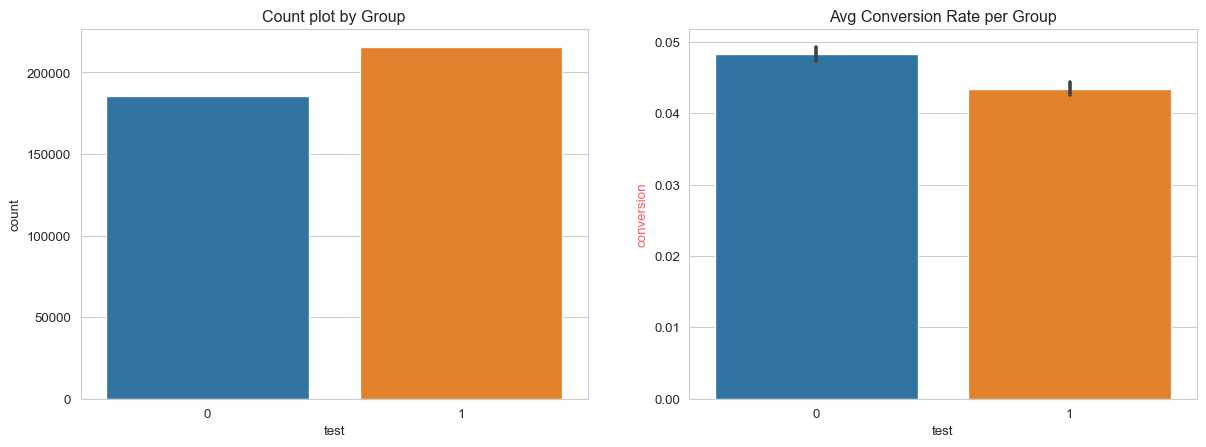

In [94]:
#Conversion Rate between conroal and test group
fig, axs = plt.subplots(ncols=2,figsize=(15,5), dpi=96)
axs[0].set_title('Count plot by Group')
axs[0].set_ylabel('Count')  

axs[1].set_title('Avg Conversion Rate per Group')
axs[1].set_ylabel('Avg Conversion Rate')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(data=conversion_by_group,x='test',ax=axs[0])
ax=sns.barplot(x='test',y='conversion',data=conversion_by_group,ax=axs[1])

### Bivariate Analysis

#### Continuous：

AGE VS Conversion

In [74]:
sns.set_style("whitegrid")

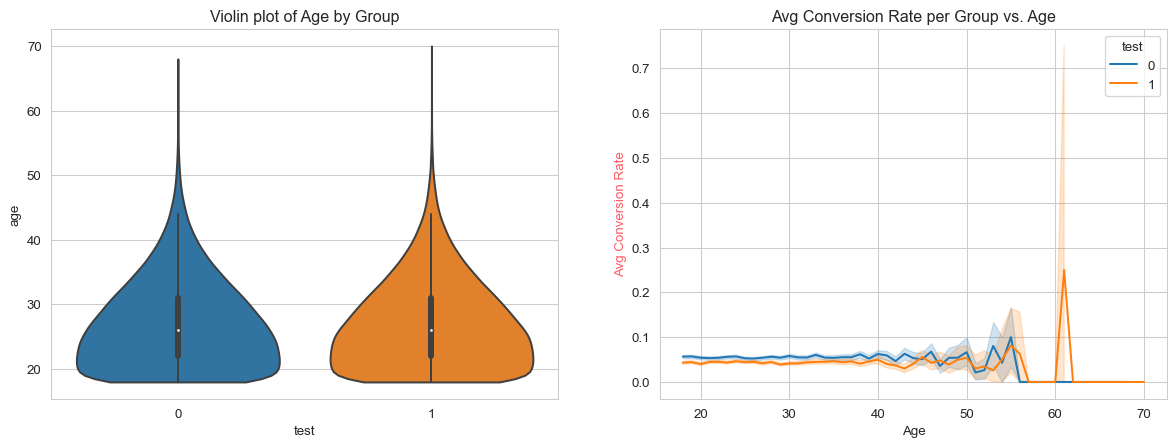

In [73]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5), dpi=96)
axs[0].set_title('Violin plot of Age by Group')
axs[0].set_ylabel('Age')  
# axs[0].tick_params(labelrotation = 45)   
# axs[0].set_xlabel('Count')

axs[1].set_title('Avg Conversion Rate per Group vs. Age')
axs[1].set_ylabel('Avg Conversion Rate')
axs[1].set_xlabel('Age')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.violinplot(data=df,x='test',y='age',cut=0, bw=.15,ax=axs[0])

ax=sns.lineplot(x='age',y='conversion',hue='test',data=df,ax=axs[1])

#### Categorical：

 Country

In [11]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom", fontsize = 7.5)

In [23]:
#By Average conversion rate
converted_country=df.groupby('country')['conversion'].mean().rename('avg_conversion').reset_index().sort_values(by='avg_conversion',ascending=False)
converted_country

,country,avg_conversion
14,Spain,0.079719
4,Costa Rica,0.053494
10,Nicaragua,0.053399
3,Colombia,0.051332
6,El Salvador,0.050765
9,Mexico,0.050341
13,Peru,0.050258
2,Chile,0.049704
16,Venezuela,0.049666
7,Guatemala,0.049653


C:\Users\seagu\AppData\Local\Temp\ipykernel_8492\1193540697.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(df['country'],rotation=45)
C:\Users\seagu\AppData\Local\Temp\ipykernel_8492\1193540697.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(df['country'],rotation=45)
posx and posy should be finite values
posx and posy should be finite values


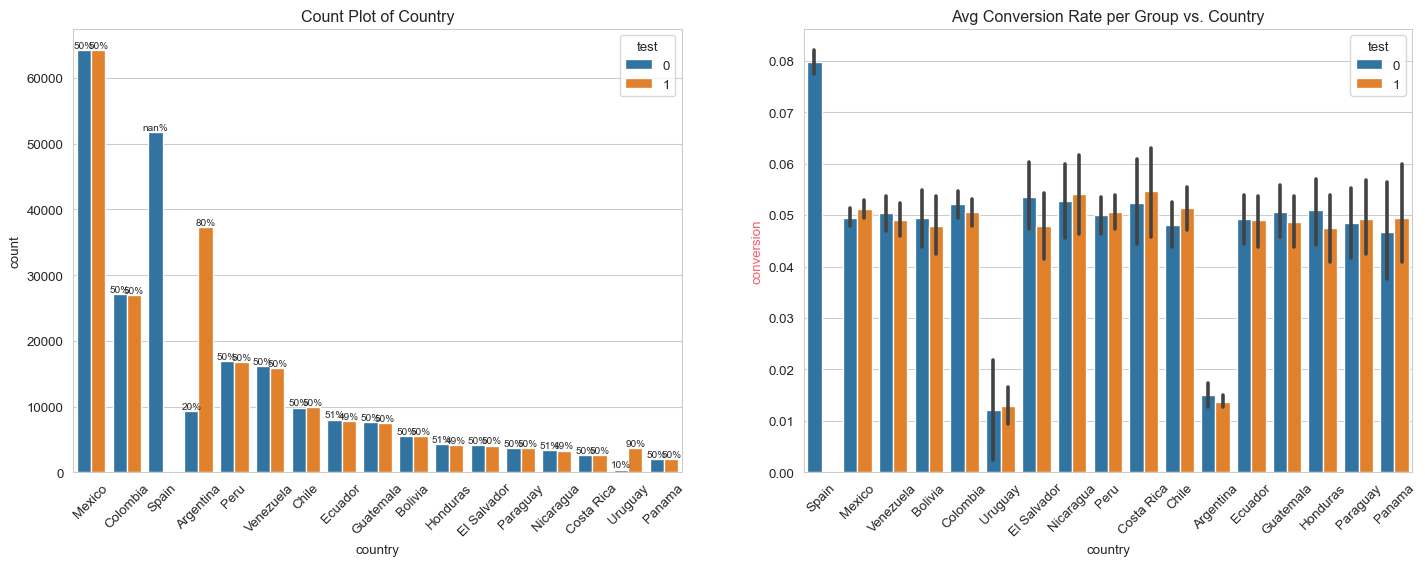

In [105]:
fig, axs = plt.subplots(ncols=2,figsize=(18,6), dpi=96)
axs[0].set_title('Count Plot of Country')
axs[0].set_ylabel('Country')  
axs[0].set_xlabel('Count')
# axs[0].tick_params(labelrotation = 45)
axs[0].set_xticklabels(df['country'],rotation=45) 

axs[1].set_title('Avg Conversion Rate per Group vs. Country')
axs[1].set_ylabel('Avg Conversion Rate')
axs[1].set_xlabel('Country')
axs[1].set_xticklabels(df['country'],rotation=45)   
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='country',hue='test',data=df,order = df['country'].value_counts().index,ax=axs[0])
barPerc(df,'country',ax)
ax=sns.barplot(x='country',y='conversion',hue='test',data=df,ax=axs[1])

sex

In [34]:
#By user stage conversion rate
convert_sex=df.groupby('sex')['conversion'].mean().rename('avg_conversion').reset_index().sort_values(by='avg_conversion',ascending=False)
convert_sex

,sex,avg_conversion
1,M,0.049640
0,F,0.049447


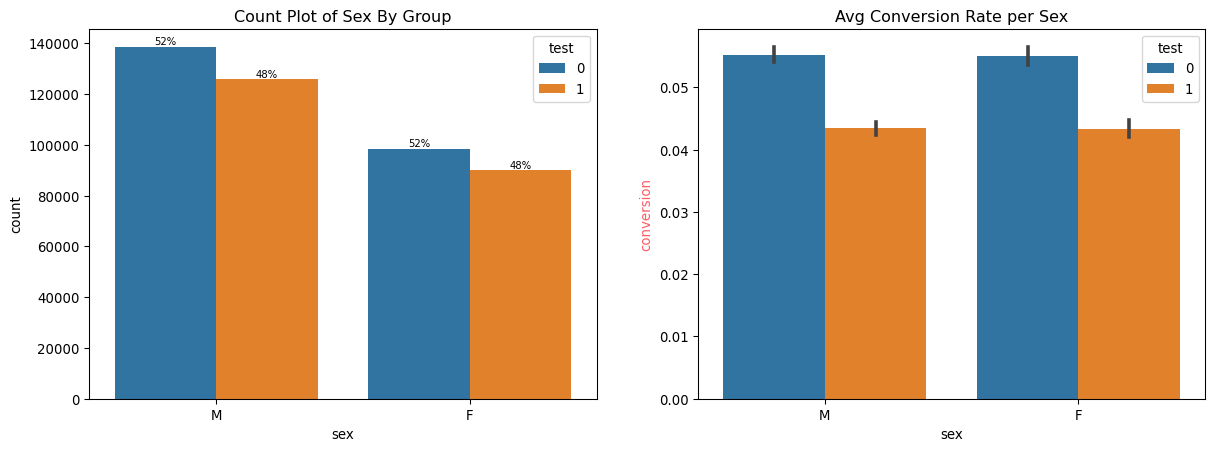

In [67]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5), dpi=96)
axs[0].set_title('Count Plot of Sex By Group')
axs[0].set_ylabel('Count')  
axs[0].set_xlabel('Sex')

axs[1].set_title('Avg Conversion Rate per Group vs. Sex')
axs[1].set_ylabel('Avg Conversion Rate')
axs[1].set_xlabel('Sex')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='sex',hue='test',data=df,order = df['sex'].value_counts().index,ax=axs[0])
barPerc(df,'sex',ax)

# ax=sns.barplot(x='sex',y='avg_conversion',data=convert_sex,ax=axs[1])
ax=sns.barplot(x='sex',y='conversion',hue='test',data=df,ax=axs[1])

Marketing Channel

In [31]:
df_plot = df.groupby(['ads_channel', 'test']).size().reset_index().pivot(columns='test', index='ads_channel', values=0)
df_plot

test,0,1
ads_channel,,
Bing,7162,6508
Facebook,35751,32607
Google,35735,32378
NA,141848,129326
Other,2213,1930
Yahoo,14384,13025


Text(0.5, 1.0, 'Stacked Bar Chart of Source vs Converted')

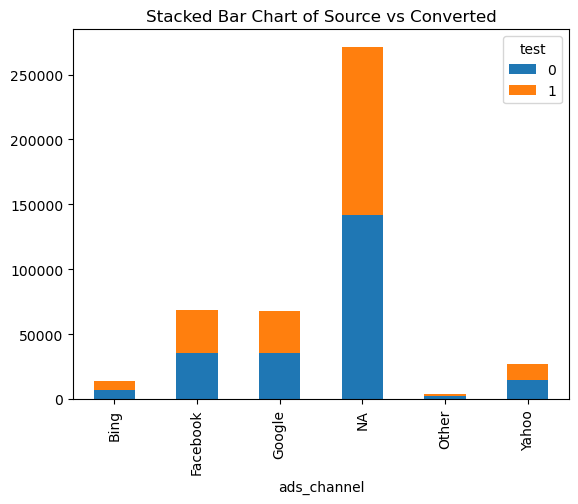

In [32]:
df_plot.plot(kind='bar', stacked=True)
plt.title("Stacked Bar Chart of Source vs Converted")

In [53]:
#By channel conversion rate
converted_source=df.groupby('ads_channel')['conversion'].mean().rename('avg_conversion').reset_index().sort_values(by='avg_conversion',ascending=False)
converted_source

,ads_channel,avg_conversion
1,Facebook,0.050704
5,Yahoo,0.050312
3,NA,0.049418
2,Google,0.049124
0,Bing,0.048866
4,Other,0.044412


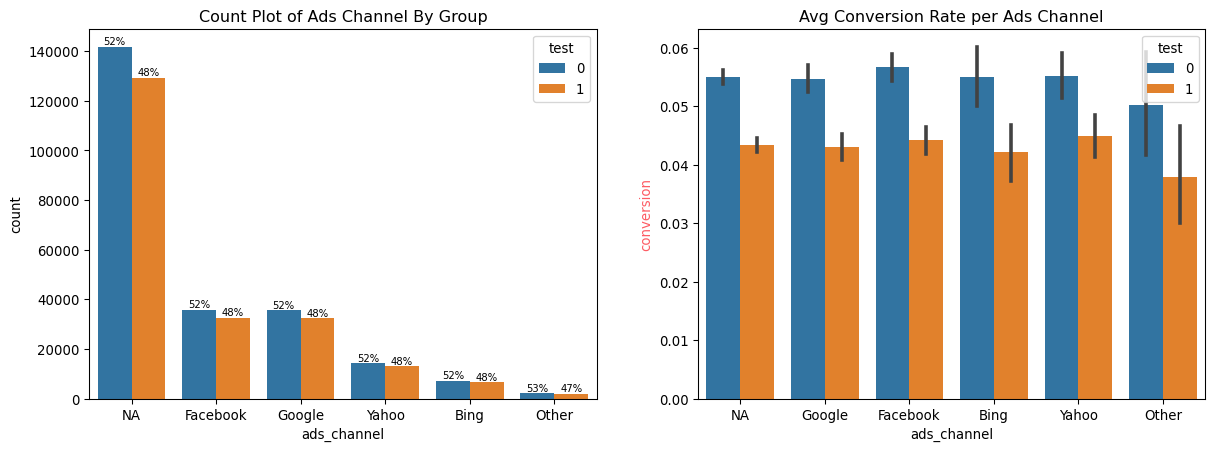

In [68]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5), dpi=96)
axs[0].set_title('Count Plot of Ads Channel By Group')
axs[0].set_ylabel('Count')  
axs[0].set_xlabel('Sex')

axs[1].set_title('Avg Conversion Rate per Group vs. Ads Channel')
axs[1].set_ylabel('Avg Conversion Rate')
axs[1].set_xlabel('Sex')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='ads_channel',hue='test',data=df,order = df['ads_channel'].value_counts().index,ax=axs[0])
barPerc(df,'ads_channel',ax)

# ax=sns.barplot(x='ads_channel',y='avg_conversion',data=converted_source,ax=axs[1])
ax=sns.barplot(x='ads_channel',y='conversion',hue='test',data=df,ax=axs[1])

language

In [39]:
#By language conversion rate
converted_language=df.groupby('browser_language')['conversion'].mean().rename('avg_conversion').reset_index().sort_values(by='avg_conversion',ascending=False)
converted_language

,browser_language,avg_conversion
1,ES,0.049759
2,Other,0.049493
0,EN,0.048384


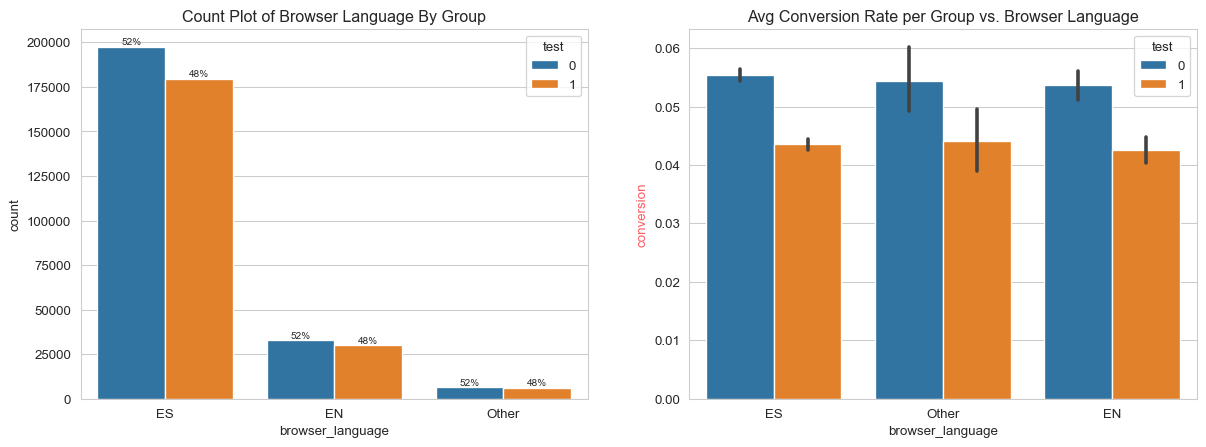

In [78]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5), dpi=96)
axs[0].set_title('Count Plot of Browser Language By Group')
axs[0].set_ylabel('Count')  
axs[0].set_xlabel('Browser Language')

axs[1].set_title('Avg Conversion Rate per Group vs. Browser Language')
axs[1].set_ylabel('Avg Conversion Rate')
axs[1].set_xlabel('Browser Language')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='browser_language',hue='test',data=df,
                order = df['browser_language'].value_counts().index,ax=axs[0])
barPerc(df,'browser_language',ax)

# ax=sns.barplot(x='browser_language',y='avg_conversion',data=converted_language,ax=axs[1])
ax=sns.barplot(x='browser_language',y='conversion',hue='test',data=df,ax=axs[1])

Source

In [57]:
#By source conversion rate
converted_source=df.groupby('source')['conversion'].mean().rename('avg_conversion').reset_index().sort_values(by='avg_conversion',ascending=False)
converted_source

,source,avg_conversion
0,Ads,0.049771
1,Direct,0.049704
2,SEO,0.049275


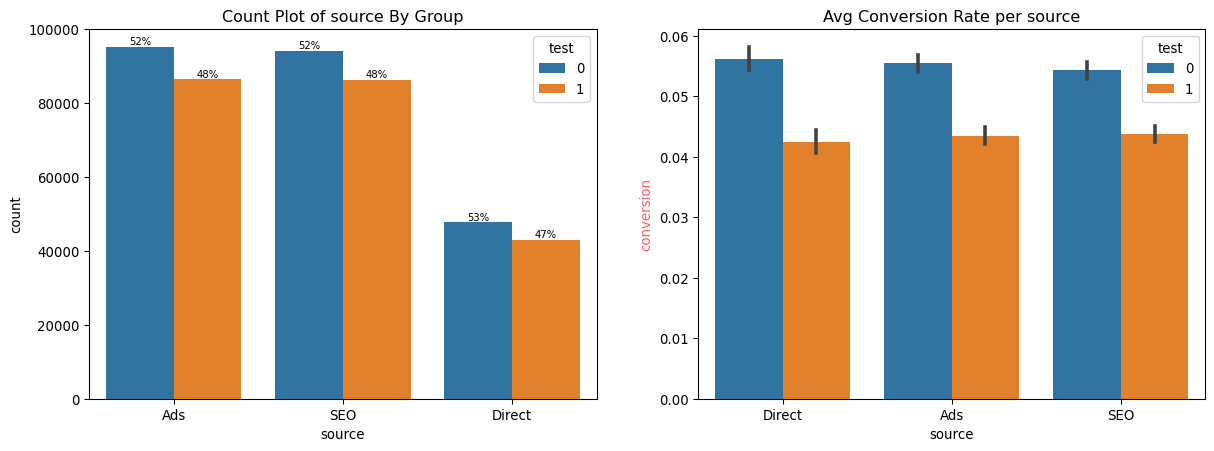

In [71]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5), dpi=96)
axs[0].set_title('Count Plot of source By Group')
axs[0].set_ylabel('Count')  
axs[0].set_xlabel('source')

axs[1].set_title('Avg Conversion Rate per Group vs. Source')
axs[1].set_ylabel('Avg Conversion Rate')
axs[1].set_xlabel('source')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='source',hue='test',data=df,order = df['source'].value_counts().index,ax=axs[0])
barPerc(df,'source',ax)

# ax=sns.barplot(x='source',y='avg_conversion',data=converted_source,ax=axs[1])
ax=sns.barplot(x='source',y='conversion',hue='test',data=df,ax=axs[1])

Device

In [59]:
#By device conversion rate
converted_device=df.groupby('device')['conversion'].mean().rename('avg_conversion').reset_index().sort_values(by='avg_conversion',ascending=False)
converted_device

,device,avg_conversion
0,Mobile,0.050097
1,Web,0.049129


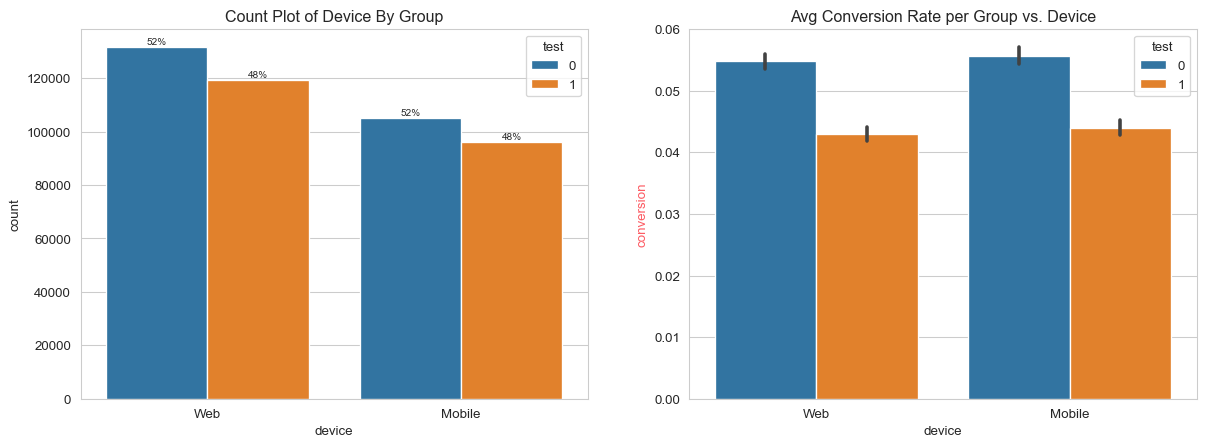

In [76]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5), dpi=96)
axs[0].set_title('Count Plot of Device By Group')
axs[0].set_ylabel('Count')  
axs[0].set_xlabel('device')

axs[1].set_title('Avg Conversion Rate per Group vs. Device')
axs[1].set_ylabel('Avg Conversion Rate')
axs[1].set_xlabel('device')
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='device',hue='test',data=df,order = df['device'].value_counts().index,ax=axs[0])
barPerc(df,'device',ax)

# ax=sns.barplot(x='device',y='avg_conversion',data=converted_device,ax=axs[1])
ax=sns.barplot(x='device',y='conversion',hue='test',data=df,ax=axs[1])

Browser

In [61]:
#By browser conversion rate
converted_browser=df.groupby('browser')['conversion'].mean().rename('avg_conversion').reset_index().sort_values(by='avg_conversion',ascending=False)
converted_browser

,browser,avg_conversion
5,Opera,0.053748
4,Iphone_App,0.050371
0,Android_App,0.050014
2,FireFox,0.049680
1,Chrome,0.049429
3,IE,0.049144
6,Safari,0.047133


C:\Users\seagu\AppData\Local\Temp\ipykernel_8492\444605585.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(df['browser'],rotation=45)
C:\Users\seagu\AppData\Local\Temp\ipykernel_8492\444605585.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(df['browser'],rotation=45)


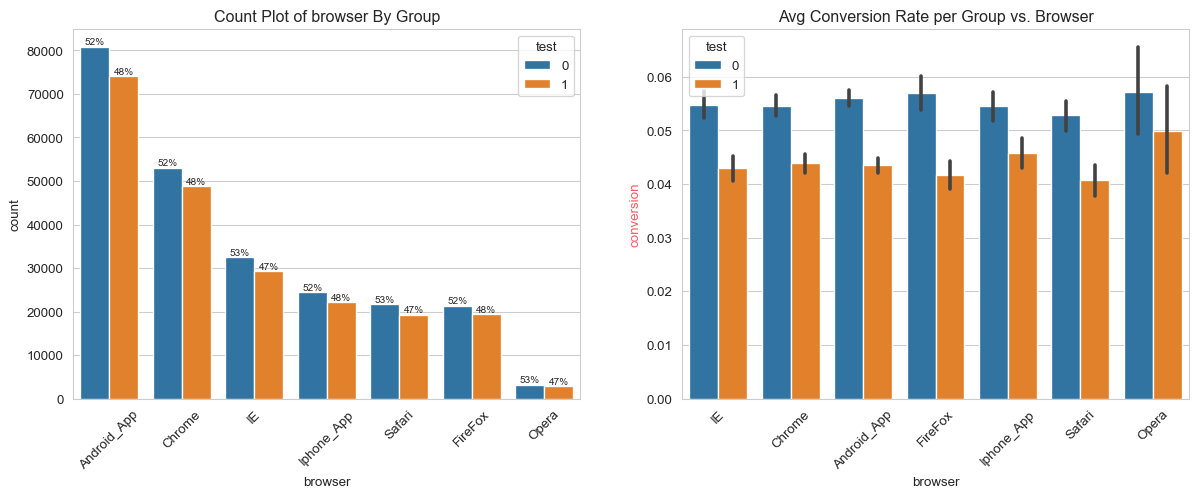

In [77]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5), dpi=96)
axs[0].set_title('Count Plot of browser By Group')
axs[0].set_ylabel('Count')  
axs[0].set_xlabel('browser')
axs[0].set_xticklabels(df['browser'],rotation=45) 

axs[1].set_title('Avg Conversion Rate per Group vs. Browser')
axs[1].set_ylabel('Avg Conversion Rate')
axs[1].set_xlabel('browser')
axs[1].set_xticklabels(df['browser'],rotation=45) 
axs[1].yaxis.label.set_color('#FD5C64') 

ax=sns.countplot(x='browser',hue='test',data=df,order = df['browser'].value_counts().index,ax=axs[0])
barPerc(df,'browser',ax)

# ax=sns.barplot(x='browser',y='avg_conversion',data=converted_browser,ax=axs[1])
ax=sns.barplot(x='browser',y='conversion',hue='test',data=df,ax=axs[1])

Main Take Away:

According to the descriptive analysis, I found that:

1. Spain-based users have a much higher conversion rate than any other Spanish-speaking country. Argentina and Uruguay have obviously lower conversion rates than other countries.

2. The conversion rate of control group is constantly higher than that of the experiment group.

3. For the experiment group, we can't see a signicant increase in the conversion rate over the days.

4. The experiment group and control group share same distribution in almost all features, except country.

## Data Preprocessing

### Split the dataset into control data and test data

In [95]:
# A/B test
test_data = df[df['country'] != 'Spain']
test_val = test_data[test_data['test'] == 1]['conversion'].values
cont_val = test_data[test_data['test'] == 0]['conversion'].values

print(test_val.mean(), '\t', cont_val.mean())

0.043411161678422794 	 0.04829179055749524


## Questions

#### Q1:Confirm that the test is actually negative. That is, test if the old version with the same translation across Spain and LatAm performs better. 

We need to run a t-test to check if the avg conversion rate of control group is significantly higher than the test group. 

https://www.pythonfordatascience.org/independent-samples-t-test-python/

In [103]:
rp.ttest(group1= test_data['conversion'][test_data['test'] == 0], group1_name= "Control",
         group2= test_data['conversion'][test_data['test'] == 1], group2_name= "Experiment")

(     Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  Control     185311.0  0.048292  0.214383  0.000498  0.047316   0.049268
 1  Experiment  215774.0  0.043411  0.203781  0.000439  0.042551   0.044271
 2  combined    401085.0  0.045666  0.208760  0.000330  0.045020   0.046312,
                      Independent t-test      results
 0  Difference (Control - Experiment) =   0.0049     
 1  Degrees of freedom =                  401083.0000
 2  t =                                   7.3823     
 3  Two side test p value =               0.0000     
 4  Difference < 0 p value =              1.0000     
 5  Difference > 0 p value =              0.0000     
 6  Cohen's d =                           0.0234     
 7  Hedge's g =                           0.0234     
 8  Glass's delta1 =                      0.0228     
 9  Point-Biserial r =                    0.0117     )

The average conversion rate for the control group, M= 0.048 (0.047, 0.049), was statistically signigicantly higher than the experiment group, M= 0.043 (0.042, 0.044); t(401083)= 7.38, p= 0.000.
There is a statistically significant difference in the conversion rate between test and experiment group, t= 7.38, p= 0.000.

#### Q2:Explain why that might be happening. Are the localized translations really worse?

In [96]:
from scipy import stats

In [97]:
countries = [name for name in test_data['country'].unique() if name is not np.nan]

print('{0:15s} {1:>15s} {2:>15s} {3:>10s}'.format('Country', 'Test Rate', 'Control Rate', 'P-Value'))
print('-' * 65)
for country in countries:
    test_val = test_data[(test_data['country'] == country) & (test_data['test'] == 1)]['conversion'].values
    cont_val = test_data[(test_data['country'] == country) & (test_data['test'] == 0)]['conversion'].values
    
    test_mean = test_val.mean()
    cont_mean = cont_val.mean()
    p_val = stats.ttest_ind(test_val, cont_val, equal_var=False).pvalue
    
    print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(country, test_mean, cont_mean, p_val))

Country               Test Rate    Control Rate    P-Value
-----------------------------------------------------------------
Mexico                  0.05119         0.04949   0.165544
Venezuela               0.04898         0.05034   0.573702
Bolivia                 0.04790         0.04937   0.718885
Colombia                0.05057         0.05209   0.423719
Uruguay                 0.01291         0.01205   0.879764
El Salvador             0.04795         0.05355   0.248127
Nicaragua               0.05418         0.05265   0.780400
Peru                    0.05060         0.04991   0.771953
Costa Rica              0.05474         0.05226   0.687876
Chile                   0.05130         0.04811   0.302848
Argentina               0.01373         0.01507   0.335147
Ecuador                 0.04899         0.04915   0.961512
Guatemala               0.04865         0.05064   0.572107
Honduras                0.04754         0.05091   0.471463
Paraguay                0.04923         0.04849  

Although the t-test result confirmed that the localized translation performed worse, it didn't truely mean that the localized translation was not a good solution.

According to the EDA above, I found that the experiment may have sample selection bias problem - experiment group had much more users from Argentina and Uruguay than conrol group, which can influence the reliabilty of the statistical result.

We should make sure that the samples in control and experiment group are ramdomly selected and share the same distribution of features.

Furthermore, we only have 5-day observation window, which can also influence the result analysis. It will be better to collect more data in a wider date range to decide whether the localized translation works.

Omit cases from Argentina and Uruguay to check the effect of localized translation

In [106]:
test_data2 = df[(df.country != 'Spain')&(df.country != 'Argentina')&(df.country != 'Uruguay')]
rp.ttest(group1= test_data2['conversion'][(test_data2['test'] == 0)], group1_name= "Control",
         group2= test_data2['conversion'][test_data2['test'] == 1], group2_name= "Experiment")

(     Variable         N      Mean        SD        SE  95% Conf.  Interval
 0  Control     175540.0  0.050148  0.218251  0.000521  0.049127   0.051169
 1  Experiment  174678.0  0.050413  0.218796  0.000524  0.049387   0.051439
 2  combined    350218.0  0.050280  0.218523  0.000369  0.049556   0.051004,
                      Independent t-test      results
 0  Difference (Control - Experiment) =  -0.0003     
 1  Degrees of freedom =                  350216.0000
 2  t =                                  -0.3583     
 3  Two side test p value =               0.7201     
 4  Difference < 0 p value =              0.3600     
 5  Difference > 0 p value =              0.6400     
 6  Cohen's d =                          -0.0012     
 7  Hedge's g =                          -0.0012     
 8  Glass's delta1 =                     -0.0012     
 9  Point-Biserial r =                   -0.0006     )

According to the t-test result above, there was no significant difference in the performance of localized translation and non-localized translation by controling the country (p-values are all greater than 0.1), which means that although localized translation didn't significantly increase conversion rate, it didn't decrease the conversion rate either.

Furthermore, when I omitted the cases from Argentina and Uruguay and recalculate the effect of AB test, I found that the p-value was greater than 0.1, which meant that there was no significant difference in control and experiment group when deleting the biased samples.

Thus, we are confident to say that we encountered a sample selection bias in this AB test case.

Our next action is to create an algorithm to automatically detect such sample selection bias before we make a conclusion.

#### Q3:design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.

Hypothesis:

If samples in the experiment and control group are randomly selected, then the cases distribution in each node of a decision tree should be balanced, which means that the experiment and control group cases are almost evenly in such dimension.

Thus, I create a decision tree with 'test' as target, to check the distribution of the experiment and control group in each node.

In [108]:
model_dta = df[df.country != 'Spain']
model_dta = model_dta[['test','source','device','browser_language','ads_channel','browser','sex','age','country']]
columns = model_dta.select_dtypes(include='object').columns.tolist()
model_dta = pd.get_dummies(model_dta, columns = columns)

In [109]:
model_dta.head()

,test,age,source_Ads,source_Direct,source_SEO,device_Mobile,device_Web,browser_language_EN,browser_language_ES,browser_language_Other,ads_channel_Bing,ads_channel_Facebook,ads_channel_Google,ads_channel_NA,ads_channel_Other,ads_channel_Yahoo,browser_Android_App,browser_Chrome,browser_FireFox,browser_IE,browser_Iphone_App,browser_Opera,browser_Safari,sex_F,sex_M,country_Argentina,country_Bolivia,country_Chile,country_Colombia,country_Costa Rica,country_Ecuador,country_El Salvador,country_Guatemala,country_Honduras,country_Mexico,country_Nicaragua,country_Panama,country_Paraguay,country_Peru,country_Uruguay,country_Venezuela
1,1,21,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,22,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,19,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,1,22,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,35,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<AxesSubplot:xlabel='test', ylabel='count'>

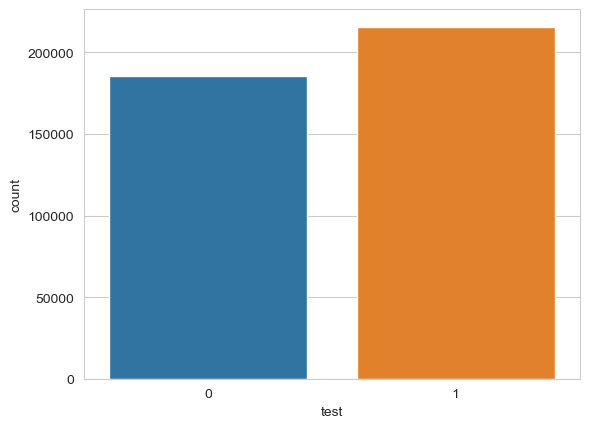

In [110]:
#check the balance between test and experiment group
sns.countplot(x='test',data=model_dta)

#### Split the dataset into train and test set

In [111]:
X = model_dta.drop('test', axis = 1)
y = model_dta['test'] 

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(320868, 40) (320868,)
(80217, 40) (80217,)


#### Modeling

In [1]:
conda install python-graphviz
import graphviz

SyntaxError: invalid syntax (2820907202.py, line 1)

In [113]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=22)
dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)

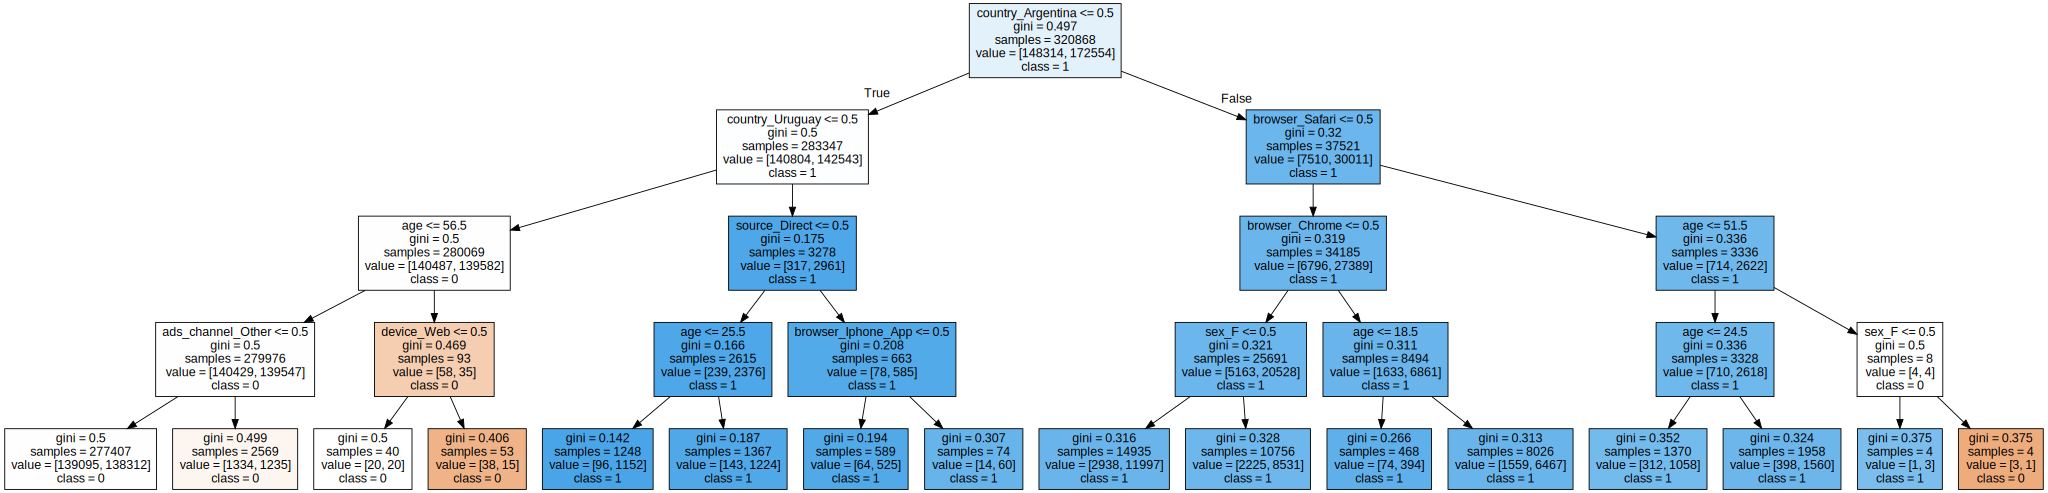

In [119]:
# DOT data
features = model_dta.columns.tolist()[1:]
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=features,  
                                class_names=['0','1'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

#### Feature Importance

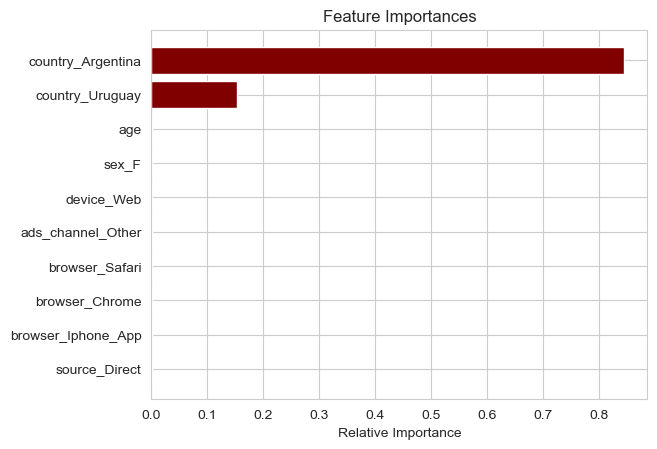

In [117]:
importances = dtree.feature_importances_
indices = np.argsort(importances)
num_features = 10 

plt.title('Feature Importances')
plt.barh(range(num_features), importances[indices[-num_features:]], color = 'maroon', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

According to the tree plot and feature importance plot above, I found that most cases are labeled as experimental group in the nodes 'country_Argentina' and 'country_Uruguay', which means that 'country_Argentina' and 'country_Uruguay' can influence the group division, causing the selection bias.